In [1]:
# Compare the f_value (measure of customers disconnected by storm, 0 -> all, 1-> none)
# for various transmission line destruction wind speed thresholds.

# Specific example: Hurricane Maria 2017, and its impacts on the Puerto Rican grid
# for 20, 35 and 50 m/s

In [2]:
import os
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import geopandas as gpd

/home/fred/anaconda3/envs/open-gira/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
# load our target data

# expect target files:
#   to be named "targets__<...>.gpkg"
#   to reside in a directory named with the wind speed threshold, e.g. "20"

target_files = sorted(
    [
        Path(p) for p in glob(os.path.join(os.getcwd(), "output", "*/**"))
        if "targets__" in p and p.endswith(".gpkg")
    ]
)
targets = {}

for path in target_files:
    wind_speed_threshold = int(path.parent.name)
    df = gpd.read_file(path)
    df.f_value = df.f_value.astype(float)
    targets[wind_speed_threshold] = df

In [4]:
# have a look at an example target dataset

targets[20].head()

,index,area_km2,population,population_density_at_centroid,country,gdp_pc,gdp,type,box_id,id,f_value,mw_loss_storm,gdp_damage,geometry
0,297,-1.217490,414.608826,None,PRI,34887.09375,1.446450e+07,target,box_1030,target_297_box_1030,0.0,1.236055,1.446450e+07,"POLYGON ((-67.08958 18.51875, -67.08542 18.518..."
1,302,-5.073125,2317.354492,None,PRI,34887.09375,8.084576e+07,target,box_1030,target_302_box_1030,0.0,6.908627,8.084576e+07,"POLYGON ((-67.07292 18.51458, -67.06042 18.514..."
2,311,-11.973287,7872.812500,None,PRI,34887.09375,2.746595e+08,target,box_1030,target_311_box_1030,0.0,23.470868,2.746595e+08,"POLYGON ((-67.11042 18.51042, -67.10208 18.510..."
3,313,2.435394,1307.583496,None,PRI,34887.09375,4.561779e+07,target,box_1030,target_313_box_1030,0.0,3.898241,4.561779e+07,"POLYGON ((-66.56042 18.48958, -66.56042 18.481..."
4,318,-5.276540,5314.834473,None,PRI,34887.09375,1.854191e+08,target,box_1030,target_318_box_1030,0.0,15.844881,1.854191e+08,"POLYGON ((-66.40208 18.49375, -66.39375 18.493..."


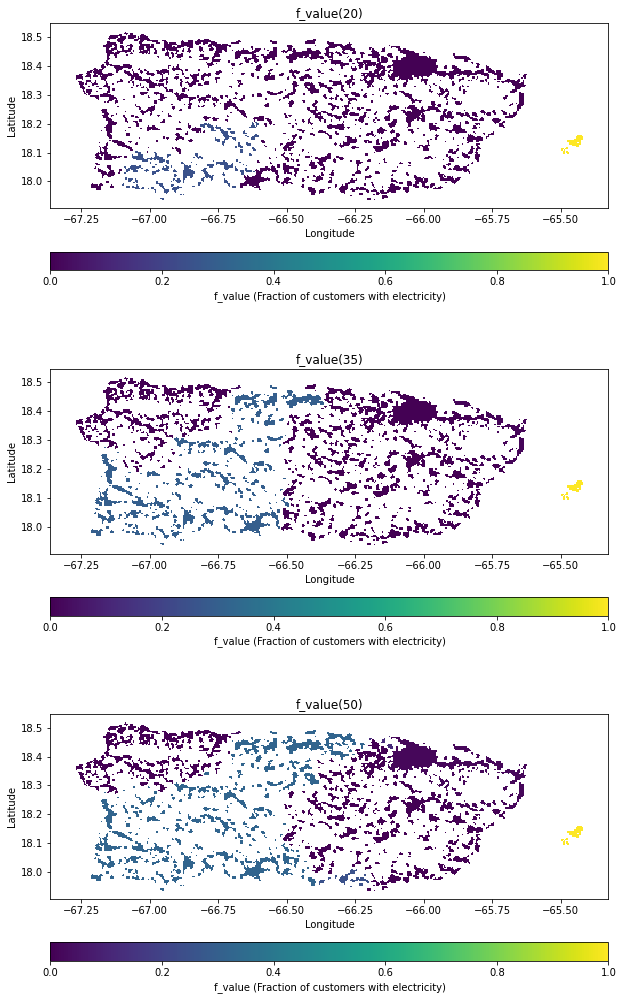

In [5]:
# f_value for various transmission line wind speed destruction thresholds

f, axes = plt.subplots(
    nrows=len(targets),
    figsize=(10, 6 * len(targets))
)

for i, (threshold, df) in enumerate(targets.items()):
    axes[i] = df.plot(
        column="f_value",
        ax=axes[i],
        cmap='viridis',
        legend=True,
        legend_kwds={
            "label": "f_value (Fraction of customers with electricity)",
            "orientation": "horizontal",
            "aspect": 30,
        }
    )
    axes[i].set_title(f"f_value({threshold})")
    axes[i].set_xlabel("Longitude")
    axes[i].set_ylabel("Latitude")

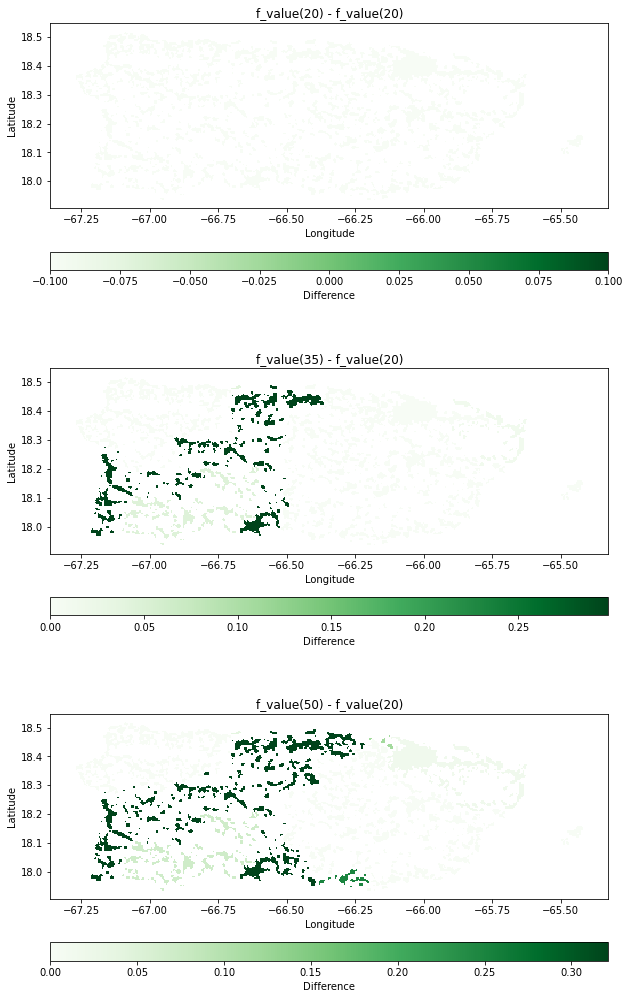

In [6]:
# Difference between f_value for various transmission line wind speed destruction thresholds

f, axes = plt.subplots(
    nrows=len(targets),
    figsize=(10, 6 * len(targets))
)
for i, (threshold, df) in enumerate(targets.items()):
    df["difference"] = df.f_value - targets[20].f_value
    axes[i] = df.plot(
        column="difference",
        cmap='Greens',
        ax=axes[i],
        legend=True,
        legend_kwds={
            "label": "Difference",
            "orientation": "horizontal",
            "aspect": 30
        }
    )
    axes[i].set_title(f"f_value({threshold}) - f_value(20)")
    axes[i].set_xlabel("Longitude")
    axes[i].set_ylabel("Latitude")